In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
gw_data = pd.read_csv(r'C:\Users\siyang\Documents\GitHub\Fantasy-Premier-League\data\2023-24\gws\merged_gw.csv')

Visualize Player Cost Spread

In [3]:
defs = gw_data[(gw_data['position'] == 'DEF')]

(array([1919., 1223.,  289.,   65.,   22.,   20.,    7.,   11.,    5.]),
 array([40., 45., 50., 55., 60., 65., 70., 75., 80., 85.]),
 <BarContainer object of 9 artists>)

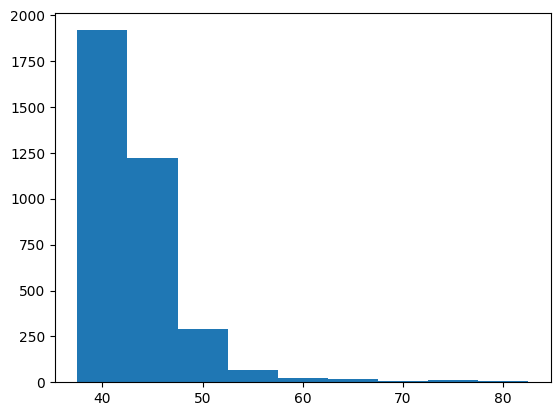

In [4]:
plt.hist(defs['value'], bins=range(40,90,5), align='left')

In [5]:
## pick 5 defenders randomly
## ignore budget first
gameweek = 1
basement_def = defs[(defs['value'] >= 40) & (defs['value'] < 45)& (defs['round'] == gameweek)]
cheap_def = defs[(defs['value'] >= 45) & (defs['value'] < 50) & (defs['round'] == gameweek)]
midprice_def = defs[(defs['value'] >= 50) & (defs['value'] < 55) & (defs['round'] == gameweek)]
expensive_def = defs[(defs['value'] >= 55) & (defs['round'] == gameweek)]

## current formation: 2 basement, 2 midprice, 1 expensive
## pick 2 basement defenders
basement_def_sample = basement_def.sample(2)
## pick 2 midprice defenders
midprice_def_sample = midprice_def.sample(2)
## pick 1 expensive defender
expensive_def_sample = expensive_def.sample(1)


In [6]:
expensive_def_sample

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
281,Virgil van Dijk,DEF,Liverpool,3.4,0,0,13,0,0.5,313,...,1,3.0,2,0,0,0,60,False,0,1


In [57]:
## concatenate all three samples together
df = pd.concat([basement_def_sample, midprice_def_sample, expensive_def_sample], axis=0)
df.columns

Index(['name', 'position', 'team', 'xP', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'expected_assists',
       'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards',
       'round', 'saves', 'selected', 'starts', 'team_a_score', 'team_h_score',
       'threat', 'total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW'],
      dtype='object')